In [54]:
#Selection of appropriate Model

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
data=pd.read_csv("train.csv")
data2=pd.read_csv("test.csv")

feature_cols=['Total_Bilirubin','Age','Direct_Bilirubin','Alkaline_Phosphotase']
X=data[feature_cols]
X.dropna(inplace=True)
#X.isnull().sum()
x=data2[feature_cols]
y=data['Dataset']
#y.isnull().sum()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)


E:\anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [55]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    print(train_predictions)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)




KNeighborsClassifier
****Results****
[1 1 1 2 1 1 1 2 2 1 1 1 1 2 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2
 1 1 1 1 1 2 1 1 1 1]
Accuracy: 68.0851%
Log Loss: 1.9288911593288032
SVC
****Results****
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
Accuracy: 80.8511%
Log Loss: 0.5029209376901193
NuSVC
****Results****
[1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 2 1 1 1 1 1 1 1 2]
Accuracy: 82.9787%
Log Loss: 0.5019603162146885
DecisionTreeClassifier
****Results****
[1 1 1 2 2 1 2 1 2 1 1 2 1 2 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 1 1 1 1 2 1 1 1 2]
Accuracy: 65.9574%
Log Loss: 11.757881325927041
RandomForestClassifier
****Results****
[1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 2 1 1 1 1 2 1 1 1 2]
Accuracy: 70.2128%
Log Loss: 0.5207266199823936


E:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoostClassifier
****Results****
[1 1 1 2 1 1 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2]
Accuracy: 76.5957%
Log Loss: 0.635792624620699
GradientBoostingClassifier
****Results****
[1 1 1 2 1 1 1 2 2 1 1 1 1 2 2 1 1 2 1 2 1 2 2 2 1 2 1 1 1 1 2 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 2]
Accuracy: 63.8298%
Log Loss: 0.5117917311294156
GaussianNB
****Results****
[2 1 2 2 2 2 2 2 2 1 1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 1 2 2 1 2 2]
Accuracy: 40.4255%
Log Loss: 1.9894027536897545
LinearDiscriminantAnalysis
****Results****
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
Accuracy: 80.8511%
Log Loss: 0.4798289037851085
QuadraticDiscriminantAnalysis
****Results****
[2 1 2 2 2 1 2 2 2 1 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 1 2 2 1 2 2]
Accuracy: 42.5532%
Log Loss: 2.473197327084633


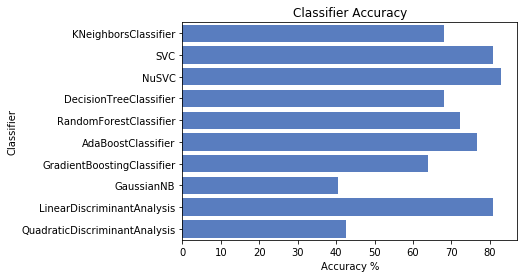

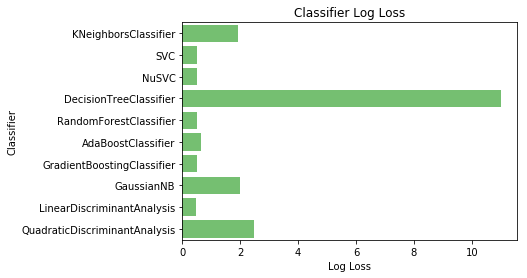

In [50]:
import seaborn as sns
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()